In [1]:
# Dependencies:
# pip install osmnx
# brew install spatialindex

Original link: `https://automating-gis-processes.github.io/2017/lessons/L7/retrieve-osm-data.html`

In [1]:
# Import all packages and helpter functions
import sys
sys.path.append('../')
from utils import *

In [2]:
place_name = "The Claremont Colleges"# "Harvey Mudd College" # "Claremont" #"The Claremont Colleges"
graph = ox.graph_from_place(place_name)
type(graph)

networkx.classes.multidigraph.MultiDiGraph

`networkx` might be helpful: https://networkx.github.io/documentation/stable/.
Python module called networkx that can be used to create, manipulate, and study the structure, dynamics, and functions of complex networks. Networkx module contains algorithms that can be used to calculate shortest paths along networks using e.g. Dijkstra’s or A* algorithm.

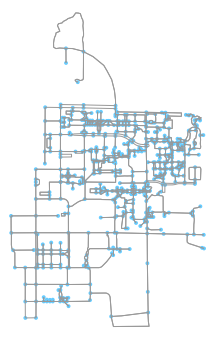

<Figure size 432x288 with 0 Axes>

In [3]:
fig, ax = ox.plot_graph(graph)
plt.tight_layout()

Now we can see that our graph contains the nodes (blue circles) and the edges (gray lines) that connects those nodes to each other.

As you might remember the street network data was not in GeoDataFrame. Luckily, osmnx provides a convenient function `graph_to_gdfs()` that can convert the graph into two separate GeoDataFrames where the first one contains the information about the nodes and the second one about the edges.

In [4]:
nodes, edges = ox.graph_to_gdfs(graph)
nodes.to_csv(raw_path + '5c_nodes.csv', index = False)
edges.to_csv(raw_path + '5c_edges.csv', index = False)

In [5]:
print(nodes.shape)
nodes.head()

(666, 5)


,highway,osmid,x,y,geometry
5326481411,NaN,5326481411,-117.704,34.1049,POINT (-117.7037585 34.1049333)
5259487244,NaN,5259487244,-117.711,34.1038,POINT (-117.7105098 34.1038156)
5259487245,NaN,5259487245,-117.711,34.1033,POINT (-117.7105138 34.1033108)
5259487246,NaN,5259487246,-117.711,34.1039,POINT (-117.710661 34.1038866)
5259487247,NaN,5259487247,-117.706,34.1034,POINT (-117.7061546 34.1033975)


In [6]:
print(edges.shape)
edges.head()

(1743, 14)


,access,geometry,highway,key,lanes,length,maxspeed,name,oneway,osmid,ref,service,u,v
0,NaN,"LINESTRING (-117.7037585 34.1049333, -117.7037...",footway,0,NaN,35.446,NaN,NaN,False,551541821,NaN,NaN,5326481411,5326481407
1,NaN,"LINESTRING (-117.7037585 34.1049333, -117.7037...",footway,1,NaN,16.388,NaN,NaN,False,551541821,NaN,NaN,5326481411,5326481407
2,NaN,"LINESTRING (-117.7037585 34.1049333, -117.7037...",footway,0,NaN,92.226,NaN,NaN,False,"[556348964, 551541822]",NaN,NaN,5326481411,5366824714
3,NaN,"LINESTRING (-117.7105098 34.1038156, -117.7106...",footway,0,NaN,13.949,NaN,NaN,False,544090137,NaN,NaN,5259487244,5257214336
4,NaN,"LINESTRING (-117.7105098 34.1038156, -117.7101...",footway,0,NaN,36.894,NaN,NaN,False,556547145,NaN,NaN,5259487244,5368746449


In [7]:
edges.isna().sum().sort_values(ascending = False)/len(edges)

ref         0.996558
lanes       0.995410
maxspeed    0.977051
service     0.972461
access      0.969593
name        0.855995
v           0.000000
u           0.000000
osmid       0.000000
oneway      0.000000
length      0.000000
key         0.000000
highway     0.000000
geometry    0.000000
dtype: float64

Great! Now we can see that our graph contains the nodes (blue circles) and the edges (gray lines) that connects those nodes to each other.

Let’s download the buildings with `buildings_from_place()` function and plot them on top of our street network

In [8]:
area = ox.gdf_from_place(place_name)
buildings = ox.buildings_from_place(place_name)

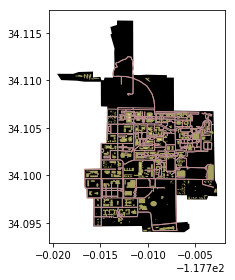

In [9]:
fig, ax = plt.subplots()
area.plot(ax=ax, facecolor='black')
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)
plt.tight_layout()

In [11]:
print(min(nodes['x']), max(nodes['x']), min(nodes['y']), max(nodes['y']))

-117.7166745 -117.7030676 34.0946863 34.110425
